In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from skimage import feature
import matplotlib.pyplot as plt

In [2]:
# load image from images directory
images = [
    "../img/kucing.jpg",
    "../img/gradient.png",
    "../img/Penguins.jpg",
    "../img/arizona.jpg",
    "../img/Tulips.jpg",
    "../img/Koala.jpg",
]

# Set up the subplot grid
rows = len(images)
cols = 4

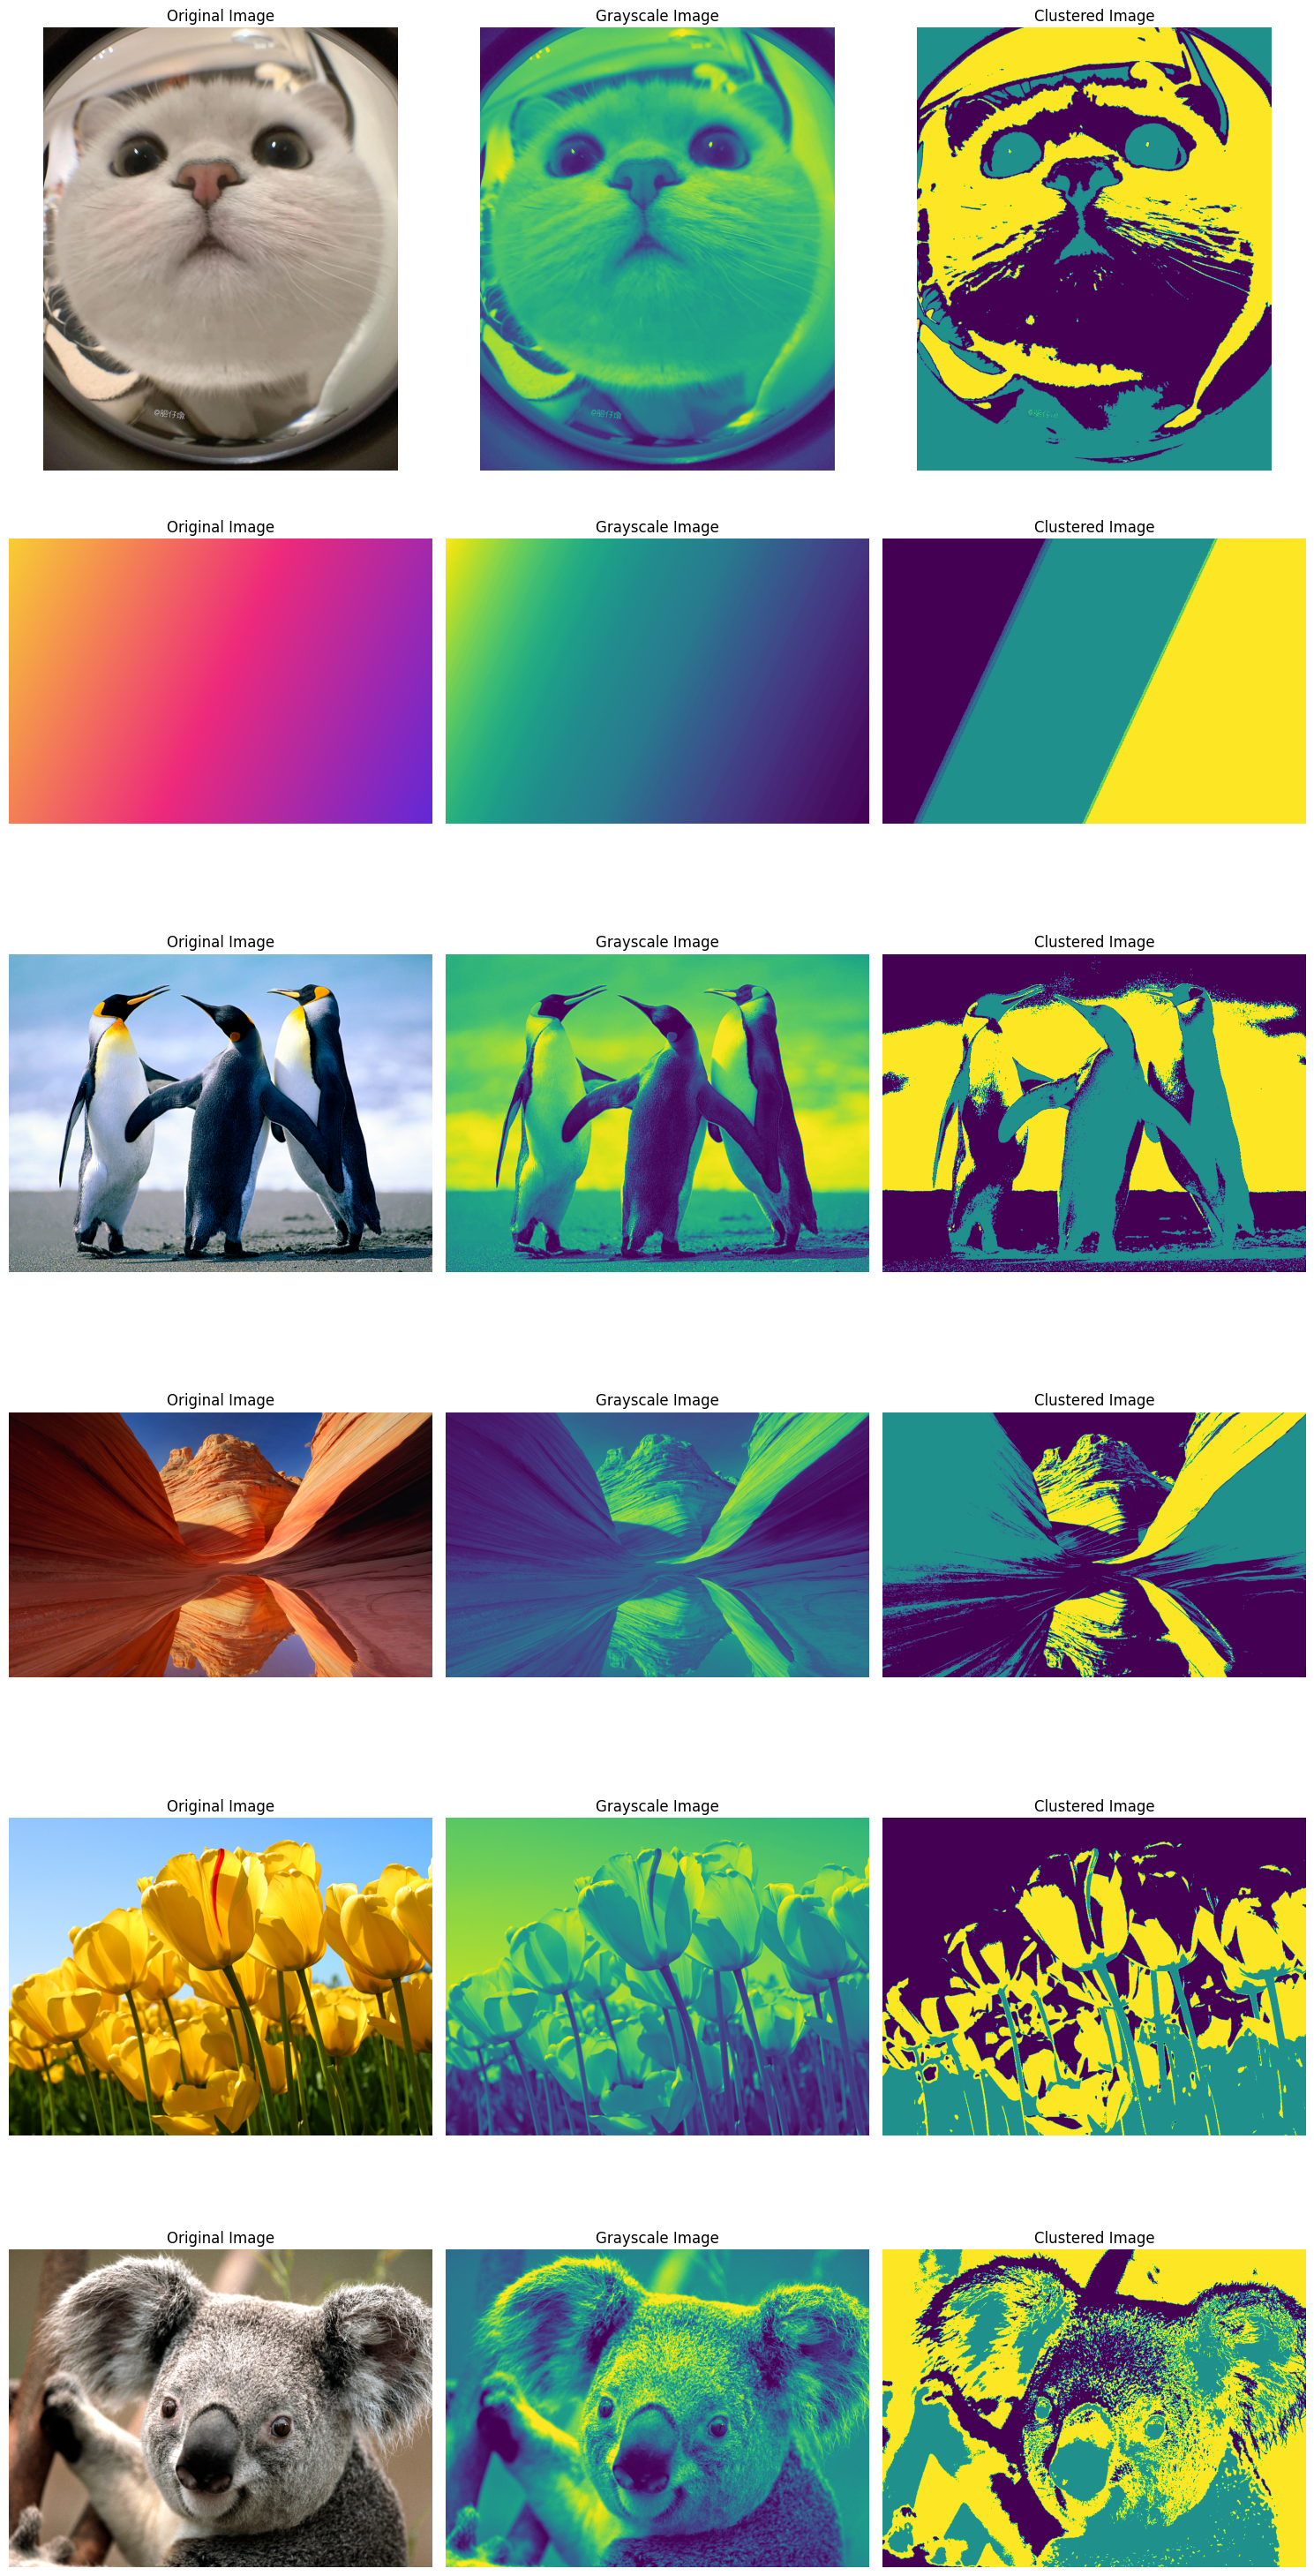

In [3]:
# Create a subplot for each image
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Loop through each image
for i, imgFilename in enumerate(images):
    # Membaca data Image
    oriImg = cv2.imread(imgFilename)

    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    # Membaca data Image
    img = cv2.imread(imgFilename, 0)

    # Extract Local Binary Pattern (LBP) features
    radius = 3
    n_points = 8 * radius
    lbp_features = feature.local_binary_pattern(img, n_points, radius, method="uniform")

    # Reshape the LBP features to a 1D array
    lbp_features_1d = lbp_features.flatten()

    # Reshape the image to a 1D array for clustering
    image_1d = img.flatten()

    # Concatenate LBP features with pixel values
    data = np.column_stack((image_1d, lbp_features_1d))

    # Apply K-Means clustering
    num_clusters = 3  # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # Reshape the labels to the shape of the original image
    clustered_image = labels.reshape(img.shape)

    titles = [
        "Grayscale Image",
        "Clustered Image",
    ]

    clustered_image = [img, clustered_image]

    for j in range(len(titles)):
        # Display the image
        axes[i, j + 1].imshow(clustered_image[j], cmap="viridis")
        axes[i, j + 1].set_title(f"{titles[j]}")
        axes[i, j + 1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()